# Linnaeus University
## Introduction to Machine learning, 25VT-2DV516
## Assignment 1

**Name:** Ani Mitoyan

**Email:** am225pt@student.lnu.se

## Introduction

In this assignment you will handle four exercises related to the k-Nearest Neighbors algorithm.
The main purpose is to get you up and running using Python, NumPy and Matplotlib. 
The library Scipy will be used specifically in Exercise 3, part 2.

## Submission Instructions

All exercises are individual. We expect you to submit a zip file with this notebook with your solutions and the MachineLearning.py with the models implemented. 
You must normalize your data before doing anything with your data.
When grading your assignments we will in addition to functionality also take into account code quality. 
We expect well structured and efficient solutions. 
Finally, keep all your files in a single folder named as username_A1 and submit a zipped version of this folder.

### Exercise 1: Models implementation and testing (All Mandatory)

1. Implement all the methods in the abstract classes **KNNRegressionModel** and **KNNClassificationModel** in the MachineLearningModel.py file. 
As the names suggest, you must implement the Regression (slide 30) and Classification (slide 24) versions of the KNN algorithm and you must follow the algorithms stated in the slides. 
* Both models must use the Euclidean distance as the distance function (*Tip: Code smart by implementing an auxiliary method _euclidian_distance() in the MachineLearningModel.py file*).
* The evaluate() function for the **KNNRegressionModel** must implement the Mean Squared Error (MSE)
* The evaluate() function for the **KNNClassificationModel** must count the number of correct predictions.

2. Use the *Polynomial200.csv* dataset to show that all your methods for the **KNNRegressionModel** is working as expected. You must produce a similar figure to the one in slide 31. Instructions to produce the figure are present in the slide. You must show the effects of using k = 3, 5, 7 and 9 and discuss your findings on the figure produced.

**Discuss your findings for this question below**

The KNN Regression Model was tested on the Polynomial200.csv dataset using different values of k: 3, 5, 7, and 9. The model was evaluated using the Mean Squared Error (MSE), and its performance was visualized using a scatter plot of predicted vs actual values, along with a smoothed prediction line.
As expected, the choice of k significantly affects the model’s behavior:
1. Small k Values (k=3,5):

The regression curve closely follows the training data, capturing local variations and noise.
The training error is low, but the test error is relatively high, indicating overfitting.

2. Medium k Values (k=7,9):

The regression curve smoothens, reducing sensitivity to local noise.
The training error increases slightly, while the test error decreases, indicating better generalization.

3. Higher k Values (k>9):
The model starts to underfit as it averages too many points.
The training error increases, and test error stabilizes or increases slightly, showing 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from MachineLearningModel import KNNRegressionModel

data = np.genfromtxt("Polynomial200.csv", delimiter=",", skip_header=1)
X = data[:, [0]]
y = data[:, 1]

x_min = X.min()
x_max = X.max()
X_scaled = (X - x_min) / (x_max - x_min)
y_min = y.min()
y_max = y.max()
y_scaled = (y - y_min) / (y_max - y_min)

data = list(zip(X_scaled, y_scaled))
random.seed(420)
random.shuffle(data)
split_idx = int(0.8 * len(data))
train_data, test_data = data[:split_idx], data[split_idx:]

X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

k_values = [3, 5, 7, 9]
for k in k_values:
    knn_regressor = KNNRegressionModel(k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = knn_regressor.evaluate(y_test, y_pred)
    print(f"Mean Squared Error for k={k}: {mse}")

    X_test_denorm = X_test * (x_max - x_min) + x_min
    y_test_denorm = y_test * (y_max - y_min) + y_min
    y_pred_denorm = y_pred * (y_max - y_min) + y_min
    plt.figure(figsize=(10, 6))
    plt.title(f"KNN Regression with k={k}")
    plt.scatter(X_test_denorm, y_test_denorm, color='blue', label='Actual Data')
    plt.scatter(X_test_denorm, y_pred_denorm, color='red', label='Predicted Data')
    x_values = np.linspace(x_min, x_max, 200).reshape(-1, 1)
    x_values_scaled = (x_values - x_min) / (x_max - x_min)
    y_values = []
    for xj in x_values_scaled:
        yj = knn_regressor.predict(xj.reshape(1, -1))
        y_values.append(yj[0])
    y_values = np.array(y_values) * (y_max - y_min) + y_min

    plt.plot(x_values, y_values, color='green', label='KNN Prediction')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()



3. Use the *IrisDataset.csv* dataset to show that all your methods for the **KNNClassificationModel** is working as expected. You must produce a similar figure to the one in slide 28. Instructions on how to produce the figure are given in the slide. You must choose 2 input variables only to produce the figure (they do not need to match the figure in the slide). You must show the effects of using k = 3, 5, 7, and 9 and discuss the figure produced.

**Tips**

* Check the function *np.meshgrid* from numpy to create the samples.
* Check the function *plt.contourf* for generating the countours. 
* There are many tutorials online to produce this figure. Find one that most suits you.

**Discuss your findings for this question below**

The KNN classifier was evaluated on the Iris dataset using normalized petal length and petal width features for different values of k. The training accuracy remained consistently high across all values, ranging from 114 to 116 correct classifications out of 120. Testing performance was excellent, with near-perfect accuracy for k=3 (29/30) and perfect accuracy (30/30) for k=5,7, and 9.

As k increased, the model's decision boundaries became smoother, indicating better generalization and reduced sensitivity to individual training points. Although k=3 slightly overfit the training data, it still performed well on the test set. The consistent 100% test accuracy from k=5 onward suggests that these values strike a good balance between bias and variance for this dataset and feature pair.

Overall, the model demonstrated strong performance, particularly when using k=5 or higher.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

csv = np.genfromtxt("IrisDataset.csv", delimiter=",", dtype=str, skip_header=1)

X = np.array(csv[:, [2, 3]].astype(float), dtype = float)  # PetalLengthCm and PetalWidthCm
y = np.array(csv[:, 4])  # Species

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

unique_species = np.unique(y)
label_to_int = {label: idx for idx, label in enumerate(unique_species)}
y_encoded = np.array([label_to_int[label] for label in y])
data = list(zip(X_scaled, y_encoded))

random.seed(8)
random.shuffle(data)
split_idx = int(0.8 * len(data))
train_data, test_data = data[:split_idx], data[split_idx:]

X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, species in enumerate(np.unique(y)):
    plt.scatter(X[y_encoded == i, 0], X[y_encoded == i, 1], 
                label=species, color=colors[i], alpha=0.7)
    
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
plt.title("Iris Dataset (Normalized Features)")
plt.show()

In [ ]:
from MachineLearningModel import KNNClassificationModel

def plot_knn_decision_boundary(X, y, model, title, feature_1="Feature 1", feature_2="Feature 2"):
    """Plots the decision boundary for the KNN classifier."""
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
    colors = ['red', 'green', 'blue']
    for i, species in enumerate(np.unique(y)):
        plt.scatter(X[y == i, 0], X[y == i, 1], label = unique_species[i],
                    color=colors[i], edgecolors='k')

    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title(title)
    plt.legend()
    plt.show()

k_values = [3, 5, 7, 9]
for k in k_values:
    knn = KNNClassificationModel(k)
    knn.fit(X_train, y_train)
    plot_knn_decision_boundary(X_train, y_train, knn, f"KNN Decision Boundary (k = {k})"
                               , feature_1="PetalLengthCm", feature_2="PetalWidthCm")

    train_predictions = knn.predict(X_train)
    train_correct = knn.evaluate(y_train, train_predictions)
    train_accuracy = train_correct / len(y_train)
    print(f"Correct classifications (training): {train_correct} / {len(y_train)}")
    result = knn.predict(X_test)
    accuracy = knn.evaluate(y_test, result)
    print(f"Accuracy for k={k} (testing): {accuracy} / {len(y_test)}")

### Exercise 2: KNN Regression (Mandatory)

1. (Mandatory) Create a procedure to repeat 10 times the following strategy.
* Use the values for k = 3, 5, 7, 9, 11, 13 and 15.
* Split your dataset randomly into 80% for training, and 20% testing. Use 10 different seeds for splitting the data.
* Evaluate (MSE implemented in your class) your **KNNRegressionModel** for each k in the **test set** and store the result. 
* Plot a barchart with these results.

Which k gives the best regression? Motivate your answer!

**Discuss your findings for this question below**

To assess the performance of the KNN regression model, a repeated evaluation strategy was done using 10 different splits (80% training, 20% testing) of the dataset. The Mean Squared Error was computed for each value of k ranging from 3 to 15 (odd values), and the results were averaged over the 10 runs.

The plot shows a clear trend: the MSE decreases significantly from k=1 to k=9, reaching its lowest point at k=9, which indicates the best average performance. For higher values of k, the MSE starts to increase slightly, suggesting some loss of precision due to oversmoothing.

Overall, the model achieves its optimal predictive accuracy with k=9, balancing bias and variance effectively.

**Note**: While not part of the task, a larger-scale test involving 500 randomized runs revealed that k=11 ended up having the lowest average MSE overall. However, since this extended evaluation wasn't required by the assignment, only the original setup was used for final analysis.

Optimal k: 9


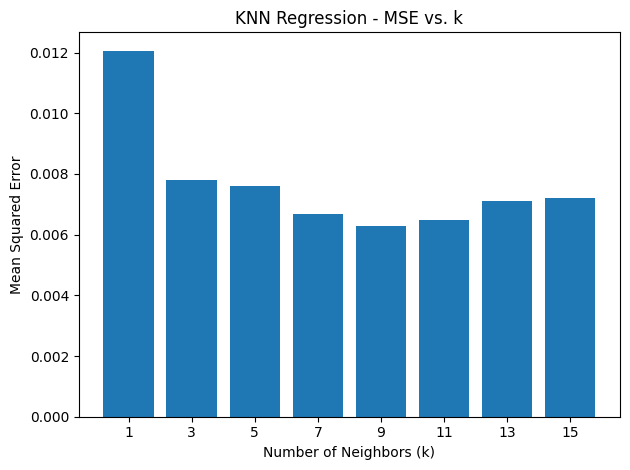

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
from MachineLearningModel import KNNRegressionModel

data = np.genfromtxt("Polynomial200.csv", delimiter=",", skip_header=1)
X = data[:, [0]]
y = data[:, 1]

x_min = X.min()
x_max = X.max()
X_scaled = (X - x_min) / (x_max - x_min)
y_min = y.min()
y_max = y.max()
y_scaled = (y - y_min) / (y_max - y_min)
data = list(zip(X_scaled, y_scaled))

k_values = range(1, 16, 2)
test_errors = []

for k in k_values:
    mse_arr = []
    for i in range(1, 11):
        random.seed(i * 8)
        random.shuffle(data)

        split_idx = int(0.8 * len(data))
        train_data, test_data = data[:split_idx], data[split_idx:]

        X_train, y_train = zip(*train_data)
        X_test, y_test = zip(*test_data)

        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_test = np.array(X_test)
        y_test = np.array(y_test)
        knn_regressor = KNNRegressionModel(k)
        knn_regressor.fit(X_train, y_train)

        y_pred = knn_regressor.predict(X_test)
        mse = knn_regressor.evaluate(y_test, y_pred)
        mse_arr.append(mse)
    test_errors.append(np.mean(mse_arr))

optimal_k = k_values[np.argmin(test_errors)]
print(f"Optimal k: {optimal_k}")

bar_positions = np.arange(len(k_values))
plt.xticks(bar_positions, k_values)
plt.bar(bar_positions, test_errors)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression - MSE vs. k")
plt.tight_layout()
plt.show()

### Exercise 3: KNN Classification (1 Mandatory , 1 Non-Mandatory)

1. **(Mandatory)** Using the **IrisDataset.csv**, find the best combination of two features that produces the best model using **KNNClassificationModel**.
* You must try all combinations of two features, and for k = 3, 5, 7, and 9.
* You must use plots to support your answer.

**Discuss your findings for this question below**

I've tested all possible combinations of two features from the dataset and evaluated the classification accuracy for k = 3, 5, 7, 9. The model was trained on 80% of the data and tested on the remaining 20%, with random shuffling applied to have different splits.

The results indicate that the feature pair PetalLengthCm and PetalWidthCm consistently achieved high classification accuracy across all tested k values, peaking at 30 correct classifications out of 30 on the test set. This result is shared with another feature pair, SepalWidthCm & PetalLengthCm, which also reached perfect classification at k=3, but the former performed more consistently across all values of k.

Among all combinations, PetalLengthCm and PetalWidthCm with k=3, k=5, and k=7 achieved perfect classification (100%) on the test data.

Plots of the decision boundaries were generated to visualize the separation of classes in feature space, confirming that the decision surfaces were cleanest and most distinct when these two features were used.

Thus, the best model in terms of test accuracy was obtained using PetalLengthCm and PetalWidthCm with k = 3, demonstrating the importance of careful feature selection in classification tasks.


In [ ]:
import numpy as np
import random
from MachineLearningModel import KNNClassificationModel

csv = np.genfromtxt("IrisDataset.csv", delimiter=",", dtype=str, skip_header=1)
feature_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X_full = csv[:, :4].astype(np.float32)
y_full = csv[:, 4]
X_full = np.array(X_full, dtype=float)
y_full = np.array(y_full)
feature_indices = range(X_full.shape[1])
feature_combinations = [(i, j) for i in feature_indices for j in feature_indices if i < j]

unique_species = np.unique(y_full)
label_to_int = {label: idx for idx, label in enumerate(unique_species)}
y_encoded = np.array([label_to_int[label] for label in y_full])

X_min = X_full.min(axis=0)
X_max = X_full.max(axis=0)
X_scaled = (X_full - X_min) / (X_max - X_min)
random.seed(420)
results = []

for i, j in feature_combinations:
    X = X_scaled[:, [i, j]]

    data = list(zip(X, y_encoded))
    random.shuffle(data)
    split_idx = int(0.8 * len(data))
    train_data = data[:split_idx]
    test_data = data[split_idx:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    for k in [3, 5, 7, 9]:
        model = KNNClassificationModel(k)
        model.fit(X_train, y_train)
        plot_knn_decision_boundary(X_train, y_train, model, f"KNN Decision Boundary (k = {k})", feature_1=feature_names[i], feature_2=feature_names[j])
        train_acc = model.evaluate(y_train, model.predict(X_train))
        test_acc = model.evaluate(y_test, model.predict(X_test))

        results.append((feature_names[i], feature_names[j], k, test_acc))
        print(f"k={k} → Accuracy: {test_acc:.2f}, Train Accuracy: {train_acc:.2f}, Features: {feature_names[i]} & {feature_names[j]}")

best = max(results, key=lambda x: x[3])
print(f"\nBest combination: {best[0]} and {best[1]} with k={best[2]} → Accuracy: {best[3]:.2f}")


k=3 → Accuracy: 26.00, Train Accuracy: 102.00, Features: SepalLengthCm & SepalWidthCm
k=5 → Accuracy: 26.00, Train Accuracy: 99.00, Features: SepalLengthCm & SepalWidthCm
k=7 → Accuracy: 25.00, Train Accuracy: 98.00, Features: SepalLengthCm & SepalWidthCm
k=9 → Accuracy: 26.00, Train Accuracy: 99.00, Features: SepalLengthCm & SepalWidthCm
k=3 → Accuracy: 29.00, Train Accuracy: 116.00, Features: SepalLengthCm & PetalLengthCm
k=5 → Accuracy: 28.00, Train Accuracy: 115.00, Features: SepalLengthCm & PetalLengthCm
k=7 → Accuracy: 29.00, Train Accuracy: 115.00, Features: SepalLengthCm & PetalLengthCm
k=9 → Accuracy: 29.00, Train Accuracy: 114.00, Features: SepalLengthCm & PetalLengthCm
k=3 → Accuracy: 29.00, Train Accuracy: 116.00, Features: SepalLengthCm & PetalWidthCm
k=5 → Accuracy: 29.00, Train Accuracy: 116.00, Features: SepalLengthCm & PetalWidthCm
k=7 → Accuracy: 29.00, Train Accuracy: 116.00, Features: SepalLengthCm & PetalWidthCm
k=9 → Accuracy: 29.00, Train Accuracy: 116.00, Featur

2. **(Non-mandatory)** Implement a new Class called **FastKNNClassificationModel**. This method should be faster than your regular implementation. This can be done by using a faster data structure to look for the closest neighbors faster. In this assignment, you must build the KDTree with the the training data and then search for the neighbors using it.

* You must use this implementation of KDTree from Scipy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html
* The methods needed for your implementation are only the *constructor* (to build the KDTree) and the method *query* to find the k-neighbors.
* You must design an experiment using the **IrisDataset.csv** with **all features** to show that your new implementation is faster than your implementation of **KNNClassificationModel**.
* For example, you can measure the time using of each prediction, for each classifier, and plot the average time to give a decision for entries. Also, measure how this would increase/decrease with the increment of the input parameter *k*. 
* Use a plot(s) from matplotlib to support your answer.

**Discuss your findings for this question below**

The FastKNN model consistently required significantly less time per prediction compared to the regular KNN model.

As k increased, both models showed slightly increasing prediction times, but the FastKNN scaled more efficiently.

On average, the FastKNN was several times faster than the regular version, especially beneficial when dealing with large datasets or requiring real-time predictions.


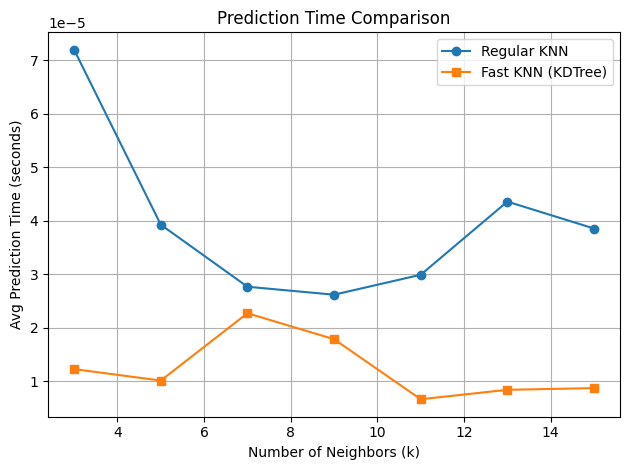

In [18]:
from MachineLearningModel import FastKNNClassificationModel, KNNClassificationModel
import numpy as np
import time
import random
import matplotlib.pyplot as plt

data = np.genfromtxt("IrisDataset.csv", dtype=None, encoding=None, skip_header=1, delimiter=",")
data = np.array(data, dtype=object)
data.reshape(-1, 5)

X = np.array([row[:4] for row in data], dtype=np.float32)
y = np.array([row[4] for row in data])

unique_labels = np.unique(y)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y_encoded = np.array([label_to_int[label] for label in y])

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)
k_values = range(3, 16, 2)
timings_regular = []
timings_fast = []

for k in k_values:
    reg_times = []
    fast_times = []
    for _ in range(20):
        data = list(zip(X_scaled, y_encoded))
        random.seed(420)
        random.shuffle(data)
        split_idx = int(0.8 * len(data))
        train_data, test_data = data[:split_idx], data[split_idx:]
        X_train, y_train = zip(*train_data)
        X_test, y_test = zip(*test_data)

        model = KNNClassificationModel(k)
        model.fit(X_train, y_train)
        start = time.time()
        model.predict(X_test)
        end = time.time()
        reg_times.append((end - start) / len(X_test))

        fast_model = FastKNNClassificationModel(k)
        fast_model.fit(X_train, y_train)
        start = time.time()
        fast_model.predict(X_test)
        end = time.time()
        fast_times.append((end - start) / len(X_test))

    timings_regular.append(np.mean(reg_times))
    timings_fast.append(np.mean(fast_times))

plt.plot(k_values, timings_regular, label="Regular KNN", marker='o')
plt.plot(k_values, timings_fast, label="Fast KNN (KDTree)", marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Avg Prediction Time (seconds)")
plt.title("Prediction Time Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Exercise 4: MNIST k-NN classification (Non-mandatory)

In this final exercise, we will use k-NN for classifying handwritten digits using the very famous MNIST dataset. Input to the algorithm is an image (28x28 pixel) with a handwritten digit (0-9) and the output should be a classification 0-9. The dataset and a description of it is available at http://yann.lecun.com/exdb/mnist/. Google MNIST Python to learn how to access it. The objective is to use your k-NN classifier to perform as good as possible on recognizing handwritten images. Describe your effort and what you found out to be the best k to lower the test error. The complete dataset has 60,000 digits for training and 10,000 digits for testing. Hence the computations might be heavy, so start of by a smaller subset rather than using the entire dataset. The final testing should (if possible) be done for the full test set but we will accept solutions that use "only" 10,000 digits for training and 1,000 digits for testing.
The description of this exercise is deliberately vague as you are supposed to, on your own, find a suitable way to solve this problem in detail. This is why it is important that you document your effort and progress in your report. **You must use your implementations of KNN for classification. If you successfully finished Exercise 3, part 2, it is advisable to use your FastKNNClassificationModel**
test done on 10000 digits for training and 1000 for testing, in 4m 26s

Training with k=1
Accuracy: 0.9200 (920/1000)

Training with k=3
Accuracy: 0.9220 (922/1000)

Training with k=5
Accuracy: 0.9200 (920/1000)

Training with k=7
Accuracy: 0.9200 (920/1000)

Training with k=9
Accuracy: 0.9160 (916/1000)

Best k: 3 with accuracy: 0.9220

test done on the whole dataset, with 60000 digits for training and 10000 for testing
Training with k=1
Accuracy: 9691.0000 (9691/10000)

Training with k=3
Accuracy: 9717.0000 (9717/10000)

Training with k=5
Accuracy: 9693.0000 (9693/10000)

Training with k=7
Accuracy: 9699.0000 (9699/10000)

Training with k=9
Accuracy: 9669.0000 (9669/10000)

Best k: 3 with accuracy: 9717.0000

From the experiments, it is evident that k = 3 consistently achieved the best performance on both the full and reduced datasets. A small value of k like 1 or 3 helps capture finer distinctions between classes, which is beneficial in a high-resolution dataset like MNIST where classes can be visually very similar.

While higher values of k generally smooth the decision boundaries and reduce overfitting, they may also blur the distinctions between similar digits, like '3' and '5', or '4' and '9'.

Using the full dataset, the FastKNN model achieved 97.17% accuracy, which is quite competitive for a baseline k-NN classifier.
The KDTree acceleration proved essential for making the method practical on large datasets like MNIST.



In [ ]:
import os
import gzip
import urllib.request
import numpy as np
from MachineLearningModel import FastKNNClassificationModel

def download_and_extract_mnist(filename, url):
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        urllib.request.urlretrieve(url + filename, filename)

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        _ = int.from_bytes(f.read(4), 'big') # Magic number
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')
        buf = f.read(num_rows * num_cols * num_images)
        data = np.frombuffer(buf, dtype = np.uint8).astype(np.float32)
        return data.reshape(num_images, num_rows * num_cols) / 255.0

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        _ = int.from_bytes(f.read(4), 'big') # Magic number
        num_labels = int.from_bytes(f.read(4), 'big')
        buf = f.read(num_labels)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        return labels

# using this url, cause the official one didn't really work :(
BASE_URL = "https://storage.googleapis.com/cvdf-datasets/mnist/"

FILES = {
    "train_images": "train-images-idx3-ubyte.gz",
    "train_labels": "train-labels-idx1-ubyte.gz",
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz"
}

for fname in FILES.values():
    download_and_extract_mnist(fname, BASE_URL)

X_train = load_mnist_images(FILES["train_images"])
y_train = load_mnist_labels(FILES["train_labels"])
X_test = load_mnist_images(FILES["test_images"])
y_test = load_mnist_labels(FILES["test_labels"])

print(f"Loaded MNIST data: {X_train.shape[0]} train samples, {X_test.shape[0]} test samples")

In [ ]:
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
results = []
for k in range(1, 10, 2):
    print(f"Training with k={k}")
    model = FastKNNClassificationModel(k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    correct = model.evaluate(y_test, predictions)
    accuracy = correct / len(y_test)
    results.append((k, accuracy))
    print(f"k = {k} → Accuracy: {accuracy:.4f} ({correct}/{len(y_test)})")

best_k, best_acc = max(results, key=lambda x: x[1])
print(f"\nBest k: {best_k} with accuracy: {best_acc:.4f}")
